## Week 4 Project

### Import Libraries

In [146]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Load Map Data for New York and Jersey City

In [5]:
# with open('newyork_data.json') as json_data:
#     newyork_data = json.load(json_data)
# neighborhoods_data = newyork_data['features']
# # define the dataframe columns
# column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# # instantiate the dataframe
# neighborhoods = pd.DataFrame(columns=column_names)

In [7]:
# for data in neighborhoods_data:
#     borough = neighborhood_name = data['properties']['borough'] 
#     neighborhood_name = data['properties']['name']
        
#     neighborhood_latlon = data['geometry']['coordinates']
#     neighborhood_lat = neighborhood_latlon[1]
#     neighborhood_lon = neighborhood_latlon[0]
    
#     neighborhoods = neighborhoods.append({'Borough': borough,
#                                           'Neighborhood': neighborhood_name,
#                                           'Latitude': neighborhood_lat,
#                                           'Longitude': neighborhood_lon}, ignore_index=True)

In [9]:
# neighborhoods.to_csv('map_data_full.csv')

In [147]:
map_venues = pd.read_csv('map_data.csv')
map_venues.drop("Unnamed: 0",axis = 1,inplace = True)
print(map_venues.shape)

(312, 4)


In [148]:
map_venues["Neighborhood"] = map_venues["Borough"] + "_" + map_venues["Neighborhood"]

In [149]:
map_venues.head()

Borough                  Neighborhood   Latitude  Longitude
0  Manhattan         Manhattan_Marble Hill  40.876551 -73.910660
1  Manhattan           Manhattan_Chinatown  40.715618 -73.994279
2  Manhattan  Manhattan_Washington Heights  40.851903 -73.936900
3  Manhattan              Manhattan_Inwood  40.867684 -73.921210
4  Manhattan    Manhattan_Hamilton Heights  40.823604 -73.949688

In [150]:
address = 'New York City, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Display the map to verify the input data

In [151]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(map_venues['Latitude'], map_venues['Longitude'], map_venues['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

### Get Venue Data

#### Define Foursquare Credentials and Version

In [152]:
CLIENT_ID = 'GCYSXEPAHKWCKHMKMF4VD4U3P4ZYLSFK42YFUJI2SNB0PTTZ' # your Foursquare ID
CLIENT_SECRET = 'UEGFKNYSV0FWL0MBP3GBLHWTVAH0DYK2GI0YIJEG4I1JEQDO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: GCYSXEPAHKWCKHMKMF4VD4U3P4ZYLSFK42YFUJI2SNB0PTTZ
CLIENT_SECRET:UEGFKNYSV0FWL0MBP3GBLHWTVAH0DYK2GI0YIJEG4I1JEQDO


#### Foursqure API calls

In [153]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        try:
            results_temp = requests.get(url).json()["response"]
            results = results_temp['groups'][0]['items']
        except:
            #import traceback
            #traceback.print_exc()
            #input("Program crashed; press Enter to exit")
            print("Error Occured at ", name)
            #return(results_temp)
        
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue Name', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [154]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
#nearby_venues = getNearbyVenues(names=map_venues['Neighborhood'],
#                                  latitudes=map_venues['Latitude'],
#                                  longitudes=map_venues['Longitude']
#                                 )
#nearby_venues.to_csv('venue_data_full2.csv')

Manhattan_Marble Hill
Manhattan_Chinatown
Manhattan_Washington Heights
Manhattan_Inwood
Manhattan_Hamilton Heights
Manhattan_Manhattanville
Manhattan_Central Harlem
Manhattan_East Harlem
Manhattan_Upper East Side
Error Occured at  Manhattan_Upper East Side
Manhattan_Yorkville
Manhattan_Lenox Hill
Manhattan_Roosevelt Island
Manhattan_Upper West Side
Error Occured at  Manhattan_Upper West Side
Manhattan_Lincoln Square
Error Occured at  Manhattan_Lincoln Square
Manhattan_Clinton
Manhattan_Midtown
Manhattan_Murray Hill
Manhattan_Chelsea
Manhattan_Greenwich Village
Manhattan_East Village
Manhattan_Lower East Side
Manhattan_Tribeca
Manhattan_Little Italy
Manhattan_Soho
Manhattan_West Village
Manhattan_Manhattan Valley
Manhattan_Morningside Heights
Manhattan_Gramercy
Manhattan_Battery Park City
Manhattan_Financial District
Manhattan_Carnegie Hill
Manhattan_Noho
Manhattan_Civic Center
Manhattan_Midtown South
Manhattan_Sutton Place
Manhattan_Turtle Bay
Manhattan_Tudor City
Manhattan_Stuyvesant 

### The codes above will save the venue data into a csv file, so we can now load directly

In [155]:
nearby_venues = pd.read_csv('venue_data_full2.csv')
nearby_venues.drop("Unnamed: 0",axis = 1,inplace = True)
print(nearby_venues.shape)

(10196, 7)


In [156]:
nearby_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Manhattan_Marble Hill              40.876551               -73.91066   
1  Manhattan_Marble Hill              40.876551               -73.91066   
2  Manhattan_Marble Hill              40.876551               -73.91066   
3  Manhattan_Marble Hill              40.876551               -73.91066   
4  Manhattan_Marble Hill              40.876551               -73.91066   

      Venue Name  Venue Latitude  Venue Longitude Venue Category  
0       Arturo's       40.874412       -73.910271    Pizza Place  
1    Bikram Yoga       40.876844       -73.906204    Yoga Studio  
2  Tibbett Diner       40.880404       -73.908937          Diner  
3      Starbucks       40.877531       -73.905582    Coffee Shop  
4        Dunkin'       40.877136       -73.906666     Donut Shop

#### Foursqure Higher Level Catagories

Foursquare default venue category is too granular, let's take a look at higher levels

In [157]:
url =  "https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}".format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)

results_c = requests.get(url).json()

Append higher level venue data to the original venue data file

In [158]:
venues_list = []
for results in results_c["response"]['categories']:
    for results2 in results['categories']:
        if results2['categories'] != []:
            for results3 in results2['categories']:
                if results3['categories'] != []:
                    for results4 in results3['categories']:
                        venues_list.append([results['name'],results2['name'],results3['name'],results4['name']])
                else:
                    venues_list.append([results['name'],results2['name'],results3['name'],results3['name']])    
        else:
                venues_list.append([results['name'],results2['name'],results2['name'],results2['name']])

Delete the redundant information

In [159]:
catagory_list = pd.DataFrame([venue_list for venue_list in venues_list])
catagory_list.columns = ['Level I', 'Level II','Level III','Level IV']
# catagory_list.rename(columns={"A": "Level I", "B": "Level II","B": "Level III","B": "Level IV"})

print(nearby_venues.shape)
nearby_venues_full = pd.merge(nearby_venues,catagory_list,left_on='Venue Category', right_on='Level IV',how = "left");
print(nearby_venues_full.shape)

catagory_list2 = catagory_list[:]
catagory_list2.drop(['Level IV'],axis = 1,inplace=True)
catagory_list2.columns = ['Level I 2', 'Level II 2','Level III 2']
nearby_venues_full = pd.merge(nearby_venues_full,catagory_list2,left_on='Venue Category', right_on='Level III 2',how = "left");
nearby_venues_full = nearby_venues_full.drop_duplicates();
print(nearby_venues_full.shape)

catagory_list2 = catagory_list[:]
catagory_list2.drop(['Level III','Level IV'],axis = 1,inplace=True)
catagory_list2.columns = ['Level I 3', 'Level II 3']
nearby_venues_full = pd.merge(nearby_venues_full,catagory_list2,left_on='Venue Category', right_on='Level II 3',how = "left");
nearby_venues_full = nearby_venues_full.drop_duplicates();
print(nearby_venues_full.shape)

catagory_list2 = catagory_list[:]
catagory_list2.drop(['Level II','Level III','Level IV'],axis = 1,inplace=True)
catagory_list2.columns = ['Level I 4']
nearby_venues_full = pd.merge(nearby_venues_full,catagory_list2,left_on='Venue Category', right_on='Level I 4',how = "left");
nearby_venues_full = nearby_venues_full.drop_duplicates();
print(nearby_venues_full.shape)

(10196, 7)
(10196, 11)
(10196, 14)
(10196, 16)
(10196, 17)


C:\ANAC\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [160]:
nearby_venues_full["Level I"][nearby_venues_full["Level I"].isnull()] = nearby_venues_full["Level I 2"][nearby_venues_full["Level I"].isnull()] 
nearby_venues_full["Level I"][nearby_venues_full["Level I"].isnull()] = nearby_venues_full["Level I 3"][nearby_venues_full["Level I"].isnull()] 
nearby_venues_full["Level I"][nearby_venues_full["Level I"].isnull()] = nearby_venues_full["Level I 4"][nearby_venues_full["Level I"].isnull()] 

nearby_venues_full["Level II"][nearby_venues_full["Level II"].isnull()] = nearby_venues_full["Level II 2"][nearby_venues_full["Level II"].isnull()] 
nearby_venues_full["Level II"][nearby_venues_full["Level II"].isnull()] = nearby_venues_full["Level II 3"][nearby_venues_full["Level II"].isnull()] 

nearby_venues_full["Level III"][nearby_venues_full["Level III"].isnull()] = nearby_venues_full["Level III 2"][nearby_venues_full["Level III"].isnull()] 

nearby_venues_full["Level II"][nearby_venues_full["Level II"].isnull()] = nearby_venues_full["Level I"][nearby_venues_full["Level II"].isnull()]
nearby_venues_full["Level III"][nearby_venues_full["Level III"].isnull()] = nearby_venues_full["Level II"][nearby_venues_full["Level III"].isnull()]
nearby_venues_full["Level IV"][nearby_venues_full["Level IV"].isnull()] = nearby_venues_full["Level III"][nearby_venues_full["Level IV"].isnull()]

nearby_venues_full.drop(['Level I 2','Level II 2','Level III 2','Level I 3','Level II 3','Level I 4'],axis = 1,inplace = True)

C:\ANAC\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ANAC\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ANAC\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ANAC\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWa

In [161]:
print(nearby_venues.shape)
nearby_venues.head()

(10196, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Manhattan_Marble Hill              40.876551               -73.91066   
1  Manhattan_Marble Hill              40.876551               -73.91066   
2  Manhattan_Marble Hill              40.876551               -73.91066   
3  Manhattan_Marble Hill              40.876551               -73.91066   
4  Manhattan_Marble Hill              40.876551               -73.91066   

      Venue Name  Venue Latitude  Venue Longitude Venue Category  
0       Arturo's       40.874412       -73.910271    Pizza Place  
1    Bikram Yoga       40.876844       -73.906204    Yoga Studio  
2  Tibbett Diner       40.880404       -73.908937          Diner  
3      Starbucks       40.877531       -73.905582    Coffee Shop  
4        Dunkin'       40.877136       -73.906666     Donut Shop

In [162]:
nearby_venues_full.isnull().any()

Neighborhood              False
Neighborhood Latitude     False
Neighborhood Longitude    False
Venue Name                False
Venue Latitude            False
Venue Longitude           False
Venue Category            False
Level I                   False
Level II                  False
Level III                 False
Level IV                  False
dtype: bool

In [163]:
print(nearby_venues_full.shape)

(10196, 11)


In [164]:
nearby_venues_full.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Manhattan_Marble Hill              40.876551               -73.91066   
1  Manhattan_Marble Hill              40.876551               -73.91066   
2  Manhattan_Marble Hill              40.876551               -73.91066   
3  Manhattan_Marble Hill              40.876551               -73.91066   
4  Manhattan_Marble Hill              40.876551               -73.91066   

      Venue Name  Venue Latitude  Venue Longitude Venue Category  \
0       Arturo's       40.874412       -73.910271    Pizza Place   
1    Bikram Yoga       40.876844       -73.906204    Yoga Studio   
2  Tibbett Diner       40.880404       -73.908937          Diner   
3      Starbucks       40.877531       -73.905582    Coffee Shop   
4        Dunkin'       40.877136       -73.906666     Donut Shop   

                 Level I            Level II             Level III  \
0                   Food         Pizza Place           Pizza Place   
1  Outdoors & Recreation  Athletics & Sports  Gym / Fitness Center   
2                   Food               Diner                 Diner   
3                   Food         Coffee Shop           Coffee Shop   
4                   Food          Donut Shop            Donut Shop   

      Level IV  
0  Pizza Place  
1  Yoga Studio  
2        Diner  
3  Coffee Shop  
4   Donut Shop

#### Data reformat

In [165]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [166]:
def dataReformat(df, column):
    num_top_venues = 5
    # one hot encoding
    data_onehot = pd.get_dummies(df[column], prefix="", prefix_sep="")
    # add neighborhood column back to dataframe
    data_onehot['Neighborhood'] = df['Neighborhood'] 
    # move neighborhood column to the first column
    fixed_columns = [data_onehot.columns[-1]] + list(data_onehot.columns[:-1])
    data_onehot = data_onehot[fixed_columns]
    
    data_grouped = data_onehot.groupby('Neighborhood').mean().reset_index()
    data_grouped.head()
    
    indicators = ['st', 'nd', 'rd']
    # create columns according to number of top venues
    columns = ['Neighborhood']
    for ind in np.arange(num_top_venues):
        try:
            columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        except:
            columns.append('{}th Most Common Venue'.format(ind+1))

    # create a new dataframe
    neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
    neighborhoods_venues_sorted['Neighborhood'] = data_grouped['Neighborhood']

    for ind in np.arange(data_grouped.shape[0]):
        neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(data_grouped.iloc[ind, :], num_top_venues)
    
    return [data_onehot,data_grouped,neighborhoods_venues_sorted]
    

In [167]:
[data_onehot,data_grouped,neighborhoods_venues_sorted] = dataReformat(nearby_venues_full,'Level II')

In [168]:
print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted.head()

(310, 6)


Neighborhood 1st Most Common Venue          2nd Most Common Venue  \
0      Bronx_Allerton           Pizza Place                  Deli / Bodega   
1    Bronx_Baychester                  Bank                     Donut Shop   
2  Bronx_Bedford Park                 Diner             Mexican Restaurant   
3       Bronx_Belmont    Italian Restaurant              Food & Drink Shop   
4     Bronx_Bronxdale     Food & Drink Shop  Paper / Office Supplies Store   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
0     Food & Drink Shop      Department Store      Asian Restaurant  
1           Music Venue             Pet Store           Bus Station  
2           Pizza Place     Food & Drink Shop         Deli / Bodega  
3           Pizza Place         Deli / Bodega                Bakery  
4    Italian Restaurant                  Bank    Spanish Restaurant

In [169]:
print(data_grouped.shape)
data_grouped.head()

(310, 283)


Neighborhood  Adult Boutique  Afghan Restaurant  African Restaurant  \
0      Bronx_Allerton             0.0                0.0                 0.0   
1    Bronx_Baychester             0.0                0.0                 0.0   
2  Bronx_Bedford Park             0.0                0.0                 0.0   
3       Bronx_Belmont             0.0                0.0                 0.0   
4     Bronx_Bronxdale             0.0                0.0                 0.0   

   American Restaurant  Antique Shop  Arcade  Art Gallery  \
0             0.034483           0.0    0.00          0.0   
1             0.000000           0.0    0.05          0.0   
2             0.000000           0.0    0.00          0.0   
3             0.010526           0.0    0.00          0.0   
4             0.000000           0.0    0.00          0.0   

   Arts & Crafts Store  Arts & Entertainment  Asian Restaurant  \
0                  0.0                   0.0          0.068966   
1                  0.0                   0.0          0.000000   
2                  0.0                   0.0          0.062500   
3                  0.0                   0.0          0.010526   
4                  0.0                   0.0          0.071429   

   Athletics & Sports  Auditorium  Australian Restaurant  Austrian Restaurant  \
0            0.034483         0.0                    0.0                  0.0   
1            0.000000         0.0                    0.0                  0.0   
2            0.062500         0.0                    0.0                  0.0   
3            0.010526         0.0                    0.0                  0.0   
4            0.071429         0.0                    0.0                  0.0   

   Auto Garage  Auto Workshop  Automotive Shop  BBQ Joint  Baby Store  \
0          0.0            0.0              0.0        0.0         0.0   
1          0.0            0.0              0.0        0.0         0.0   
2          0.0            0.0              0.0        0.0         0.0   
3          0.0            0.0              0.0        0.0         0.0   
4          0.0            0.0              0.0        0.0         0.0   

   Bagel Shop    Bakery      Bank       Bar  Bath House  Beach  Big Box Store  \
0         0.0  0.000000  0.000000  0.000000         0.0    0.0            0.0   
1         0.0  0.000000  0.100000  0.000000         0.0    0.0            0.0   
2         0.0  0.000000  0.000000  0.031250         0.0    0.0            0.0   
3         0.0  0.052632  0.031579  0.021053         0.0    0.0            0.0   
4         0.0  0.000000  0.071429  0.000000         0.0    0.0            0.0   

   Bike Rental / Bike Share  Bike Shop  Bike Trail  Bistro  Board Shop  \
0                       0.0        0.0         0.0     0.0         0.0   
1                       0.0        0.0         0.0     0.0         0.0   
2                       0.0        0.0         0.0     0.0         0.0   
3                       0.0        0.0         0.0     0.0         0.0   
4                       0.0        0.0         0.0     0.0         0.0   

   Boat or Ferry  Bookstore  Bowling Alley  Breakfast Spot  Brewery  \
0            0.0        0.0            0.0        0.034483      0.0   
1            0.0        0.0            0.0        0.000000      0.0   
2            0.0        0.0            0.0        0.000000      0.0   
3            0.0        0.0            0.0        0.000000      0.0   
4            0.0        0.0            0.0        0.071429      0.0   

   Bridal Shop  Bridge  Bubble Tea Shop  Buffet  Building  Burger Joint  \
0          0.0     0.0              0.0     0.0       0.0           0.0   
1          0.0     0.0              0.0     0.0       0.0           0.0   
2          0.0     0.0              0.0     0.0       0.0           0.0   
3          0.0     0.0              0.0     0.0       0.0           0.0   
4          0.0     0.0              0.0     0.0       0.0           0.0   

   Bus Station  Bus Stop  Bu

## Cluster Test

Find the best K in K means

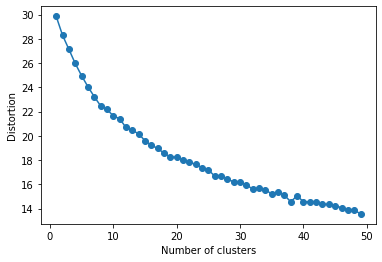

In [204]:
import matplotlib.pyplot as plt
data_grouped_clustering = data_grouped.drop('Neighborhood', 1)
distortions = []
for i in range(1, 50):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=3000,
        tol=1e-05, random_state=0
    )
    km.fit(data_grouped_clustering+0.01)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 50), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

No clear elbow point is found, let's take a look at agglomerative clustering instead

In [205]:
# K Means
# set number of clusters
kclusters = 20
data_grouped_clustering = data_grouped.drop('Neighborhood', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(data_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([8, 8, 4, 2, 4, 8, 8, 7, 3, 7])

In [206]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted['Cluster Labels'] = kmeans.labels_
data_merged = map_venues

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
# data_merged = data_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
data_merged = pd.merge(data_merged,neighborhoods_venues_sorted, on='Neighborhood',how = 'right')
print(neighborhoods_venues_sorted.shape)
print(data_merged.shape)

(310, 9)
(310, 12)


In [207]:
neighborhoods_venues_sorted.shape

(310, 9)

#### Visualize on Map

In [208]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(data_merged['Latitude'], data_merged['Longitude'], data_merged['Neighborhood'], data_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [209]:
g = data_merged["Cluster Labels"].values[data_merged["Neighborhood"] == "Jersey City_JC07310"][0]
print(data_merged[data_merged["Cluster Labels"] == g].shape)
data_merged[data_merged["Cluster Labels"] == g].head()

(38, 12)


Borough         Neighborhood   Latitude  Longitude  \
41  Jersey City  Jersey City_JC07304  40.716452 -74.072530   
44  Jersey City  Jersey City_JC07310  40.731901 -74.040200   
48        Bronx    Bronx_Eastchester  40.887556 -73.827806   
61        Bronx        Bronx_Fordham  40.860997 -73.896427   
66        Bronx     Bronx_Mott Haven  40.806239 -73.916100   

   1st Most Common Venue 2nd Most Common Venue      3rd Most Common Venue  \
41     Food & Drink Shop  Fast Food Restaurant                Pizza Place   
44    Athletics & Sports     Food & Drink Shop           Asian Restaurant   
48  Caribbean Restaurant         Deli / Bodega                      Diner   
61        Clothing Store            Donut Shop          Mobile Phone Shop   
66    Athletics & Sports    Spanish Restaurant  Latin American Restaurant   

   4th Most Common Venue      5th Most Common Venue  Cluster Labels KMEANS  \
41   Fried Chicken Joint  Cajun / Creole Restaurant                     18   
44           Gas Station     Furniture / Home Store                     18   
48           Bus Station                     Bakery                     18   
61    Athletics & Sports       Fast Food Restaurant                     18   
66           Pizza Place                 Donut Shop                     18   

    Cluster Labels AGGLOM  Cluster Labels  
41                      0              18  
44                      0              18  
48                      0              18  
61                      0              18  
66                      0              18

Now let's take a look at the most sensitive venue in each neiborhood

In [210]:
Neighborhood = 'Jersey City_JC07310'
groupNumber = neighborhoods_venues_sorted["Cluster Labels"].values[neighborhoods_venues_sorted["Neighborhood"] == Neighborhood][0]
ind_Neighborhood = np.where(neighborhoods_venues_sorted['Neighborhood'][neighborhoods_venues_sorted["Cluster Labels"] == groupNumber] == Neighborhood)[0][0]
c = len(nearby_venues.loc[nearby_venues['Neighborhood'] == Neighborhood,'Neighborhood'])
data_grouped_clustering_temp = data_grouped_clustering[:]
data_with_in_group = data_grouped_clustering_temp[neighborhoods_venues_sorted["Cluster Labels"] == groupNumber]
dist_matrix = distance_matrix(data_with_in_group,data_with_in_group) 
totalDistance_original = sum(dist_matrix[ind_Neighborhood,:])
totalDistance = []
for i in range(0,data_grouped_clustering.shape[1]):
    
    data_grouped_clustering_temp = data_grouped_clustering[:]
    data_with_in_group = data_grouped_clustering_temp[neighborhoods_venues_sorted["Cluster Labels"] == groupNumber]
    data_with_in_group.iloc[ind_Neighborhood,i] = data_with_in_group.iloc[ind_Neighborhood,i] +1/c
    data_with_in_group.iloc[ind_Neighborhood,:] = data_with_in_group.iloc[ind_Neighborhood,:]/sum(data_with_in_group.iloc[ind_Neighborhood,:])
    dist_matrix = distance_matrix(data_with_in_group,data_with_in_group) 
    totalDistance.append(sum(dist_matrix[ind_Neighborhood,:]))
    #print("New Distance: {:.4f}".format(sum(dist_matrix[ind_Neighborhood,:])))
    
    
totalDistance_sorted = sorted(totalDistance)
print("Neighborhood:",Neighborhood)
print("Original Distance: {:.3f}".format(totalDistance_original))
print("The best business is     : --{}--     with distance reduced to {:.3f}".format(data_grouped_clustering_temp.columns[totalDistance.index(totalDistance_sorted[0])],totalDistance_sorted[0]))
print("The 2nd best business is : --{}--     with distance reduced to {:.3f}".format(data_grouped_clustering_temp.columns[totalDistance.index(totalDistance_sorted[1])],totalDistance_sorted[1]))
print("The 3rd best business is : --{}--     with distance reduced to {:.3f}".format(data_grouped_clustering_temp.columns[totalDistance.index(totalDistance_sorted[2])],totalDistance_sorted[2]))

outputDF.append([data_grouped_clustering_temp.columns[totalDistance.index(totalDistance_sorted[0])],data_grouped_clustering_temp.columns[totalDistance.index(totalDistance_sorted[1])],data_grouped_clustering_temp.columns[totalDistance.index(totalDistance_sorted[2])]])

C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ANAC\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


Neighborhood: Jersey City_JC07310
Original Distance: 10.962
The best business is     : --Caribbean Restaurant--     with distance reduced to 10.765
The 2nd best business is : --Clothing Store--     with distance reduced to 10.795
The 3rd best business is : --Latin American Restaurant--     with distance reduced to 10.795


In [212]:
outputDF = []
outputDF.append([data_grouped_clustering_temp.columns[totalDistance.index(totalDistance_sorted[0])],data_grouped_clustering_temp.columns[totalDistance.index(totalDistance_sorted[1])],data_grouped_clustering_temp.columns[totalDistance.index(totalDistance_sorted[2])]])

In [213]:
outputDF

[['Caribbean Restaurant', 'Clothing Store', 'Latin American Restaurant']]

In [227]:
def FindBestVenues(kclusters, neighborhoods_venues_sorted, map_venues,outputDF,Neighborhood):
    data_grouped_clustering = data_grouped.drop('Neighborhood', 1)
    # run k-means clustering
    kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(data_grouped_clustering)

    # add clustering labels
    neighborhoods_venues_sorted['Cluster Labels'] = kmeans.labels_
    data_merged = map_venues[:]
    data_merged = pd.merge(data_merged,neighborhoods_venues_sorted, on='Neighborhood',how = 'right')

    #Neighborhood = 'Jersey City_JC07310'
    groupNumber = neighborhoods_venues_sorted["Cluster Labels"].values[neighborhoods_venues_sorted["Neighborhood"] == Neighborhood][0]
    ind_Neighborhood = np.where(neighborhoods_venues_sorted['Neighborhood'][neighborhoods_venues_sorted["Cluster Labels"] == groupNumber] == Neighborhood)[0][0]
    c = len(nearby_venues.loc[nearby_venues['Neighborhood'] == Neighborhood,'Neighborhood'])
    data_grouped_clustering_temp = data_grouped_clustering[:]
    data_with_in_group = data_grouped_clustering_temp[neighborhoods_venues_sorted["Cluster Labels"] == groupNumber]
    dist_matrix = distance_matrix(data_with_in_group,data_with_in_group) 
    totalDistance_original = sum(dist_matrix[ind_Neighborhood,:])
    totalDistance = []
    for i in range(0,data_grouped_clustering.shape[1]):

        data_grouped_clustering_temp = data_grouped_clustering[:]
        data_with_in_group = data_grouped_clustering_temp[neighborhoods_venues_sorted["Cluster Labels"] == groupNumber]
        data_with_in_group.iloc[ind_Neighborhood,i] = data_with_in_group.iloc[ind_Neighborhood,i] +1/c
        data_with_in_group.iloc[ind_Neighborhood,:] = data_with_in_group.iloc[ind_Neighborhood,:]/sum(data_with_in_group.iloc[ind_Neighborhood,:])
        dist_matrix = distance_matrix(data_with_in_group,data_with_in_group) 
        totalDistance.append(sum(dist_matrix[ind_Neighborhood,:]))
        #print("New Distance: {:.4f}".format(sum(dist_matrix[ind_Neighborhood,:])))


    totalDistance_sorted = sorted(totalDistance)
    print("Neighborhood:",Neighborhood)
    print("K = ",kclusters)
    print("Number of Neighborhood in the Group: ",data_with_in_group.shape[0])
    print("Original Distance: {:.3f}".format(totalDistance_original))
    print("The best business is     : -- {} --     with distance reduced to {:.3f}".format(data_grouped_clustering_temp.columns[totalDistance.index(totalDistance_sorted[0])],totalDistance_sorted[0]))
    print("The 2nd best business is : -- {} --     with distance reduced to {:.3f}".format(data_grouped_clustering_temp.columns[totalDistance.index(totalDistance_sorted[1])],totalDistance_sorted[1]))
    print("The 3rd best business is : -- {} --     with distance reduced to {:.3f}".format(data_grouped_clustering_temp.columns[totalDistance.index(totalDistance_sorted[2])],totalDistance_sorted[2]))

    outputDF.append([kclusters,data_with_in_group.shape[0],data_grouped_clustering_temp.columns[totalDistance.index(totalDistance_sorted[0])],data_grouped_clustering_temp.columns[totalDistance.index(totalDistance_sorted[1])],data_grouped_clustering_temp.columns[totalDistance.index(totalDistance_sorted[2])]])
    return outputDF

In [228]:
outputDF = []
for k in range(5,41):
    FindBestVenues(k, neighborhoods_venues_sorted, map_venues,outputDF,'Jersey City_JC07310')
    

C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  5
Number of Neighborhood in the Group:  132
Original Distance: 38.925
The best business is     : -- Pharmacy --     with distance reduced to 38.363
The 2nd best business is : -- Bus Station --     with distance reduced to 38.501
The 3rd best business is : -- Sandwich Place --     with distance reduced to 38.519


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  6
Number of Neighborhood in the Group:  139
Original Distance: 44.464
The best business is     : -- Pharmacy --     with distance reduced to 43.948
The 2nd best business is : -- Bus Station --     with distance reduced to 44.017
The 3rd best business is : -- Sandwich Place --     with distance reduced to 44.052


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  7
Number of Neighborhood in the Group:  130
Original Distance: 36.393
The best business is     : -- Bar --     with distance reduced to 35.551
The 2nd best business is : -- Coffee Shop --     with distance reduced to 35.862
The 3rd best business is : -- Italian Restaurant --     with distance reduced to 35.881


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  8
Number of Neighborhood in the Group:  114
Original Distance: 33.435
The best business is     : -- Pharmacy --     with distance reduced to 32.950
The 2nd best business is : -- Bus Station --     with distance reduced to 33.064
The 3rd best business is : -- Sandwich Place --     with distance reduced to 33.066


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  9
Number of Neighborhood in the Group:  130
Original Distance: 36.895
The best business is     : -- Pharmacy --     with distance reduced to 36.346
The 2nd best business is : -- Sandwich Place --     with distance reduced to 36.464
The 3rd best business is : -- Bus Station --     with distance reduced to 36.577


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  10
Number of Neighborhood in the Group:  94
Original Distance: 26.860
The best business is     : -- Pharmacy --     with distance reduced to 26.456
The 2nd best business is : -- Sandwich Place --     with distance reduced to 26.530
The 3rd best business is : -- Latin American Restaurant --     with distance reduced to 26.598


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  11
Number of Neighborhood in the Group:  98
Original Distance: 28.473
The best business is     : -- Pharmacy --     with distance reduced to 28.054
The 2nd best business is : -- Deli / Bodega --     with distance reduced to 28.116
The 3rd best business is : -- Pizza Place --     with distance reduced to 28.146


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  12
Number of Neighborhood in the Group:  150
Original Distance: 39.372
The best business is     : -- Bar --     with distance reduced to 38.333
The 2nd best business is : -- Italian Restaurant --     with distance reduced to 38.661
The 3rd best business is : -- Coffee Shop --     with distance reduced to 38.734


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  13
Number of Neighborhood in the Group:  68
Original Distance: 20.446
The best business is     : -- Bus Station --     with distance reduced to 20.172
The 2nd best business is : -- Pharmacy --     with distance reduced to 20.174
The 3rd best business is : -- Caribbean Restaurant --     with distance reduced to 20.188


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  14
Number of Neighborhood in the Group:  70
Original Distance: 17.647
The best business is     : -- Asian Restaurant --     with distance reduced to 17.338
The 2nd best business is : -- Bar --     with distance reduced to 17.396
The 3rd best business is : -- Mexican Restaurant --     with distance reduced to 17.409


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  15
Number of Neighborhood in the Group:  56
Original Distance: 15.692
The best business is     : -- Pharmacy --     with distance reduced to 15.455
The 2nd best business is : -- Sandwich Place --     with distance reduced to 15.468
The 3rd best business is : -- Latin American Restaurant --     with distance reduced to 15.488


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  16
Number of Neighborhood in the Group:  58
Original Distance: 17.135
The best business is     : -- Food & Drink Shop --     with distance reduced to 16.889
The 2nd best business is : -- Caribbean Restaurant --     with distance reduced to 16.922
The 3rd best business is : -- Pharmacy --     with distance reduced to 16.943


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  17
Number of Neighborhood in the Group:  97
Original Distance: 26.239
The best business is     : -- Pharmacy --     with distance reduced to 25.778
The 2nd best business is : -- Sandwich Place --     with distance reduced to 25.887
The 3rd best business is : -- Pizza Place --     with distance reduced to 25.919


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  18
Number of Neighborhood in the Group:  46
Original Distance: 13.366
The best business is     : -- Caribbean Restaurant --     with distance reduced to 13.156
The 2nd best business is : -- Pharmacy --     with distance reduced to 13.162
The 3rd best business is : -- Sandwich Place --     with distance reduced to 13.169


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  19
Number of Neighborhood in the Group:  79
Original Distance: 19.709
The best business is     : -- Asian Restaurant --     with distance reduced to 19.368
The 2nd best business is : -- Italian Restaurant --     with distance reduced to 19.383
The 3rd best business is : -- Pharmacy --     with distance reduced to 19.418


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  20
Number of Neighborhood in the Group:  38
Original Distance: 10.962
The best business is     : -- Caribbean Restaurant --     with distance reduced to 10.765
The 2nd best business is : -- Clothing Store --     with distance reduced to 10.795
The 3rd best business is : -- Latin American Restaurant --     with distance reduced to 10.795


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  21
Number of Neighborhood in the Group:  50
Original Distance: 13.276
The best business is     : -- Pizza Place --     with distance reduced to 12.989
The 2nd best business is : -- Pharmacy --     with distance reduced to 13.077
The 3rd best business is : -- Food & Drink Shop --     with distance reduced to 13.118


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  22
Number of Neighborhood in the Group:  79
Original Distance: 21.869
The best business is     : -- Pharmacy --     with distance reduced to 21.505
The 2nd best business is : -- Sandwich Place --     with distance reduced to 21.554
The 3rd best business is : -- Clothing Store --     with distance reduced to 21.600


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  23
Number of Neighborhood in the Group:  75
Original Distance: 18.338
The best business is     : -- Asian Restaurant --     with distance reduced to 17.885
The 2nd best business is : -- Italian Restaurant --     with distance reduced to 17.919
The 3rd best business is : -- Bar --     with distance reduced to 17.953


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  24
Number of Neighborhood in the Group:  41
Original Distance: 11.053
The best business is     : -- Pharmacy --     with distance reduced to 10.842
The 2nd best business is : -- Latin American Restaurant --     with distance reduced to 10.850
The 3rd best business is : -- Diner --     with distance reduced to 10.890


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  25
Number of Neighborhood in the Group:  39
Original Distance: 10.392
The best business is     : -- Sandwich Place --     with distance reduced to 10.210
The 2nd best business is : -- Pharmacy --     with distance reduced to 10.223
The 3rd best business is : -- Clothing Store --     with distance reduced to 10.245


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  26
Number of Neighborhood in the Group:  51
Original Distance: 11.343
The best business is     : -- Bar --     with distance reduced to 11.004
The 2nd best business is : -- Coffee Shop --     with distance reduced to 11.033
The 3rd best business is : -- Italian Restaurant --     with distance reduced to 11.071


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  27
Number of Neighborhood in the Group:  58
Original Distance: 15.597
The best business is     : -- Pharmacy --     with distance reduced to 15.311
The 2nd best business is : -- Sandwich Place --     with distance reduced to 15.385
The 3rd best business is : -- Diner --     with distance reduced to 15.440


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  28
Number of Neighborhood in the Group:  65
Original Distance: 17.472
The best business is     : -- Clothing Store --     with distance reduced to 17.221
The 2nd best business is : -- Mexican Restaurant --     with distance reduced to 17.229
The 3rd best business is : -- Sandwich Place --     with distance reduced to 17.251


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  29
Number of Neighborhood in the Group:  20
Original Distance: 5.344
The best business is     : -- Park --     with distance reduced to 5.203
The 2nd best business is : -- Latin American Restaurant --     with distance reduced to 5.274
The 3rd best business is : -- Coffee Shop --     with distance reduced to 5.278


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  30
Number of Neighborhood in the Group:  50
Original Distance: 14.277
The best business is     : -- Sandwich Place --     with distance reduced to 14.048
The 2nd best business is : -- Clothing Store --     with distance reduced to 14.061
The 3rd best business is : -- Pharmacy --     with distance reduced to 14.064


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  31
Number of Neighborhood in the Group:  37
Original Distance: 9.924
The best business is     : -- Pharmacy --     with distance reduced to 9.744
The 2nd best business is : -- Latin American Restaurant --     with distance reduced to 9.756
The 3rd best business is : -- Sandwich Place --     with distance reduced to 9.757


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  32
Number of Neighborhood in the Group:  37
Original Distance: 9.924
The best business is     : -- Pharmacy --     with distance reduced to 9.744
The 2nd best business is : -- Latin American Restaurant --     with distance reduced to 9.756
The 3rd best business is : -- Sandwich Place --     with distance reduced to 9.757


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  33
Number of Neighborhood in the Group:  58
Original Distance: 14.457
The best business is     : -- Italian Restaurant --     with distance reduced to 14.193
The 2nd best business is : -- Mexican Restaurant --     with distance reduced to 14.226
The 3rd best business is : -- Bar --     with distance reduced to 14.227


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  34
Number of Neighborhood in the Group:  37
Original Distance: 9.924
The best business is     : -- Pharmacy --     with distance reduced to 9.744
The 2nd best business is : -- Latin American Restaurant --     with distance reduced to 9.756
The 3rd best business is : -- Sandwich Place --     with distance reduced to 9.757


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  35
Number of Neighborhood in the Group:  41
Original Distance: 10.608
The best business is     : -- Clothing Store --     with distance reduced to 10.417
The 2nd best business is : -- Pharmacy --     with distance reduced to 10.442
The 3rd best business is : -- Latin American Restaurant --     with distance reduced to 10.448


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  36
Number of Neighborhood in the Group:  27
Original Distance: 7.062
The best business is     : -- Food & Drink Shop --     with distance reduced to 6.879
The 2nd best business is : -- Italian Restaurant --     with distance reduced to 6.953
The 3rd best business is : -- Pharmacy --     with distance reduced to 6.989


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  37
Number of Neighborhood in the Group:  50
Original Distance: 12.427
The best business is     : -- Mexican Restaurant --     with distance reduced to 12.206
The 2nd best business is : -- Latin American Restaurant --     with distance reduced to 12.219
The 3rd best business is : -- Sandwich Place --     with distance reduced to 12.242


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  38
Number of Neighborhood in the Group:  29
Original Distance: 7.814
The best business is     : -- Latin American Restaurant --     with distance reduced to 7.673
The 2nd best business is : -- Sandwich Place --     with distance reduced to 7.716
The 3rd best business is : -- Donut Shop --     with distance reduced to 7.720


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  39
Number of Neighborhood in the Group:  82
Original Distance: 22.839
The best business is     : -- Pharmacy --     with distance reduced to 22.487
The 2nd best business is : -- Sandwich Place --     with distance reduced to 22.522
The 3rd best business is : -- Latin American Restaurant --     with distance reduced to 22.567


C:\ANAC\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\ANAC\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ANAC\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Neighborhood: Jersey City_JC07310
K =  40
Number of Neighborhood in the Group:  33
Original Distance: 8.050
The best business is     : -- Mexican Restaurant --     with distance reduced to 7.874
The 2nd best business is : -- Latin American Restaurant --     with distance reduced to 7.877
The 3rd best business is : -- Bar --     with distance reduced to 7.900


In [229]:
outputDF2 = pd.DataFrame (outputDF,columns=['K','Neiborhoods in the Group','Best Business','2nd Best Business','3rd Best Business'])

In [230]:
outputDF2

K  Neiborhoods in the Group              Best Business  \
0    5                       132                   Pharmacy   
1    6                       139                   Pharmacy   
2    7                       130                        Bar   
3    8                       114                   Pharmacy   
4    9                       130                   Pharmacy   
5   10                        94                   Pharmacy   
6   11                        98                   Pharmacy   
7   12                       150                        Bar   
8   13                        68                Bus Station   
9   14                        70           Asian Restaurant   
10  15                        56                   Pharmacy   
11  16                        58          Food & Drink Shop   
12  17                        97                   Pharmacy   
13  18                        46       Caribbean Restaurant   
14  19                        79           Asian Restaurant   
15  20                        38       Caribbean Restaurant   
16  21                        50                Pizza Place   
17  22                        79                   Pharmacy   
18  23                        75           Asian Restaurant   
19  24                        41                   Pharmacy   
20  25                        39             Sandwich Place   
21  26                        51                        Bar   
22  27                        58                   Pharmacy   
23  28                        65             Clothing Store   
24  29                        20                       Park   
25  30                        50             Sandwich Place   
26  31                        37                   Pharmacy   
27  32                        37                   Pharmacy   
28  33                        58         Italian Restaurant   
29  34                        37                   Pharmacy   
30  35                        41             Clothing Store   
31  36                        27          Food & Drink Shop   
32  37                        50         Mexican Restaurant   
33  38                        29  Latin American Restaurant   
34  39                        82                   Pharmacy   
35  40                        33         Mexican Restaurant   

            2nd Best Business          3rd Best Business  
0                 Bus Station             Sandwich Place  
1                 Bus Station             Sandwich Place  
2                 Coffee Shop         Italian Restaurant  
3                 Bus Station             Sandwich Place  
4              Sandwich Place                Bus Station  
5              Sandwich Place  Latin American Restaurant  
6               Deli / Bodega                Pizza Place  
7          Italian Restaurant                Coffee Shop  
8                    Pharmacy       Caribbean Restaurant  
9                         Bar         Mexican Restaurant  
10             Sandwich Place  Latin American Restaurant  
11       Caribbean Restaurant                   Pharmacy  
12             Sandwich Place                Pizza Place  
13                   Pharmacy             Sandwich Place  
14         Italian Restaurant                   Pharmacy  
15             Clothing Store  Latin American Restaurant  
16                   Pharmacy          Food & Drink Shop  
17             Sandwich Place             Clothing Store  
18         Italian Restaurant                        Bar  
19  Latin American Restaurant                      Diner  
20                   Pharmacy             Clothing Store  
21                Coffee Shop         Italian Restaurant  
22             Sandwich Place                      Diner  
23         Mexican Restaurant             Sandwich Place  
24  Latin American Restaurant                Coffee Shop  
25             Clothing Store                   Pharmacy  
26  Latin American Restaurant             Sandwich Place  
27  Latin American Re